<a href="https://colab.research.google.com/github/haricash/climate-networks/blob/main/dealing_with_nc4_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A beginners notebook for studying nc4 data with `xarray`
## Work as a part of my Jan 2022 Sem Project
Reference link for `xarray` : https://towardsdatascience.com/handling-netcdf-files-using-xarray-for-absolute-beginners-111a8ab4463f

### Important imports

In [ ]:
import numpy as np
import xarray as xr

In [ ]:
import matplotlib.pyplot as plt

### Loading and opening data from the drive

In [ ]:
PATH = '/content/drive/MyDrive/network_project_data/TRMM-ORL-data-to-share/TRMM-rainfall-1998-2018/Copy of 3B42_Daily_*_10S-40N--60E-100E.nc4'

In [ ]:
ds = xr.open_mfdataset(PATH)

### Different attributes of the data that one can view using `xarray`

In [ ]:
ds.coords

Coordinates:
  * time     (time) datetime64[ns] 1998-01-01 1998-01-02 ... 2018-12-31
  * lon      (lon) float32 60.12 60.38 60.62 60.88 ... 99.38 99.62 99.88 100.1
  * lat      (lat) float32 -10.12 -9.875 -9.625 -9.375 ... 39.38 39.62 39.88

In [ ]:
ds.values

<bound method Mapping.values of <xarray.Dataset>
Dimensions:            (lat: 201, lon: 161, time: 7670)
Coordinates:
  * time               (time) datetime64[ns] 1998-01-01 ... 2018-12-31
  * lon                (lon) float32 60.12 60.38 60.62 ... 99.62 99.88 100.1
  * lat                (lat) float32 -10.12 -9.875 -9.625 ... 39.38 39.62 39.88
Data variables:
    precipitation      (time, lon, lat) float32 dask.array<chunksize=(365, 161, 201), meta=np.ndarray>
    precipitation_cnt  (time, lon, lat) int16 dask.array<chunksize=(365, 161, 201), meta=np.ndarray>
    randomError        (time, lon, lat) float32 dask.array<chunksize=(365, 161, 201), meta=np.ndarray>
    randomError_cnt    (time, lon, lat) int16 dask.array<chunksize=(365, 161, 201), meta=np.ndarray>
Attributes:
    BeginDate:       1998-01-01
    BeginTime:       01:30:00.000Z
    EndDate:         1998-01-02
    EndTime:         01:29:59.999Z
    FileHeader:      StartGranuleDateTime=1998-01-01T01:30:00.000Z;\012StopGr...
   

In [ ]:
ds.var

<bound method ImplementsDatasetReduce._reduce_method.<locals>.wrapped_func of <xarray.Dataset>
Dimensions:            (lat: 201, lon: 161, time: 7670)
Coordinates:
  * time               (time) datetime64[ns] 1998-01-01 ... 2018-12-31
  * lon                (lon) float32 60.12 60.38 60.62 ... 99.62 99.88 100.1
  * lat                (lat) float32 -10.12 -9.875 -9.625 ... 39.38 39.62 39.88
Data variables:
    precipitation      (time, lon, lat) float32 dask.array<chunksize=(365, 161, 201), meta=np.ndarray>
    precipitation_cnt  (time, lon, lat) int16 dask.array<chunksize=(365, 161, 201), meta=np.ndarray>
    randomError        (time, lon, lat) float32 dask.array<chunksize=(365, 161, 201), meta=np.ndarray>
    randomError_cnt    (time, lon, lat) int16 dask.array<chunksize=(365, 161, 201), meta=np.ndarray>
Attributes:
    BeginDate:       1998-01-01
    BeginTime:       01:30:00.000Z
    EndDate:         1998-01-02
    EndTime:         01:29:59.999Z
    FileHeader:      StartGranuleDateT

In [ ]:
ds.dims

Frozen(SortedKeysDict({'time': 7670, 'lon': 161, 'lat': 201}))

In [ ]:
ds.attrs

{'BeginDate': '1998-01-01',
 'BeginTime': '01:30:00.000Z',
 'EndDate': '1998-01-02',
 'EndTime': '01:29:59.999Z',
 'FileHeader': 'StartGranuleDateTime=1998-01-01T01:30:00.000Z;\\012StopGranuleDateTime=1998-01-02T01:29:59.999Z',
 'InputPointer': '3B42.19980101.03.7.HDF;3B42.19980101.06.7.HDF;3B42.19980101.09.7.HDF;3B42.19980101.12.7.HDF;3B42.19980101.15.7.HDF;3B42.19980101.18.7.HDF;3B42.19980101.21.7.HDF;3B42.19980102.00.7.HDF',
 'NCO': 'netCDF Operators version 4.9.3 (Homepage = http://nco.sf.net, Code = http://github.com/nco/nco)',
 'ProductionTime': '2016-07-20T13:48:20.000Z',
 'history': 'Wed Feb 10 11:00:48 2021: ncatted -a long_name,time,o,c,number of days so that 1998-01-01 is 0 ../3B42_Daily_1998_10S-40N--60E-100E.nc4\nWed Feb 10 11:00:48 2021: ncatted -a units,time,o,c,days since 1998-01-01 ../3B42_Daily_1998_10S-40N--60E-100E.nc4\nWed Feb 10 10:59:22 2021: ncap2 -O -s time[time]=array(0,1,$time) ../3B42_Daily_1998_10S-40N--60E-100E.nc4 ../3B42_Daily_1998_10S-40N--60E-100E.nc4\

In [ ]:
ds.sizes

Frozen(SortedKeysDict({'time': 7670, 'lon': 161, 'lat': 201}))

### Looking at specific variables

#### Dropping NaN values from the array
Reference : https://xarray.pydata.org/en/stable/generated/xarray.DataArray.dropna.html

In [ ]:
### We can drop those entries with NaN values from the list by using the dropna() method
### We need to specify the dimension along which we want to look for and drop NaN values
### However, there is no single method we can call that will drop NaN across all variables

In [ ]:
d_precp = ds.precipitation.dropna(dim='time')

### Simple plot to look at precipitation data

In [ ]:
precipitation_data = ds.precipitation
time_data = ds.time

In [ ]:
precipitation_data

<xarray.DataArray 'precipitation' (time: 7670, lon: 161, lat: 201)>
dask.array<concatenate, shape=(7670, 161, 201), dtype=float32, chunksize=(366, 161, 201), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1998-01-01 1998-01-02 ... 2018-12-31
  * lon      (lon) float32 60.12 60.38 60.62 60.88 ... 99.38 99.62 99.88 100.1
  * lat      (lat) float32 -10.12 -9.875 -9.625 -9.375 ... 39.38 39.62 39.88
Attributes:
    units:      mm
    long_name:  Daily accumulated precipitation (combined microwave-IR) estim...

ValueError: ignored

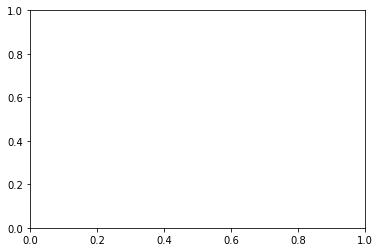

In [ ]:
plt.plot(precipitation_data)